In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter
#Load data set
data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/DS Exercise 3/Data1.csv")
data.head(10)

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
0,0.55,9.50,B,0.99740,NaN,32.0,10.0,1.90,0.58,3.13,0.22,0.080,9.0,0
1,0.32,12.70,A,0.99184,NaN,28.0,6.9,10.55,0.3,3.07,0.30,0.037,4.0,0
2,0.57,9.70,B,0.99743,NaN,86.0,7.2,2.30,0.66,3.53,0.03,0.078,16.0,0
3,0.50,9.50,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.80,A,0.99280,NaN,127.0,7.0,4.90,0.29,3.17,0.37,0.034,26.0,0
5,0.41,10.60,A,0.99300,NaN,76.0,7.0,2.10,0.22,3.20,0.33,0.052,15.0,0
6,0.76,10.00,A,0.99660,NaN,110.0,7.7,7.70,0.39,3.33,0.49,0.036,11.0,0
7,0.50,9.55,A,0.99494,NaN,170.0,6.6,8.10,0.34,3.15,0.40,0.046,68.0,0
8,0.30,11.90,A,0.99200,NaN,138.0,7.3,6.85,0.33,3.03,0.40,0.038,32.0,1
9,0.50,9.80,A,0.99345,NaN,109.0,6.4,1.50,0.16,3.38,0.37,0.037,27.0,0


EDA

In [2]:
#Information on data types of columns 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   object 
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6497 non-null   object 
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [3]:
#explore sensor3 column
data['Sensor3'].unique()
data[data['Sensor3']=='-']
data.loc[data['Sensor3']=='-','Sensor3']=''

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   object 
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6497 non-null   object 
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


ComponentAge               4
MonthlyRunTime             0
Location                   0
FlowRate                   0
OPXVolume               5692
MaxOutputRate              0
Sensor1                   10
Sensor2                    2
Sensor3                    0
Sensor4                    9
Sensor5                    3
Sensor5.1                  2
DaysSinceMaintenance       0
Target                     0
dtype: int64

In [5]:
data['Sensor3'].unique()
data["Sensor3"] = pd.to_numeric(data["Sensor3"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   object 
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6489 non-null   float64
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 710.7+ KB


In [6]:
train_data = data.describe()
train_data.pop("Target")
train_data=train_data.transpose()
train_data

,count,mean,std,min,25%,50%,75%,max
ComponentAge,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000
MonthlyRunTime,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000
FlowRate,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
OPXVolume,805.0,5.631056,3.403142,0.00000,3.00000,6.00000,9.00000,11.00000
MaxOutputRate,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
Sensor1,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
Sensor2,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
Sensor3,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
Sensor4,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
Sensor5,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000


In [7]:
data.nunique()

ComponentAge            111
MonthlyRunTime          111
Location                  2
FlowRate                998
OPXVolume                12
MaxOutputRate           276
Sensor1                 106
Sensor2                 316
Sensor3                 187
Sensor4                 108
Sensor5                  89
Sensor5.1               214
DaysSinceMaintenance    135
Target                    2
dtype: int64

In [8]:
#find categores for the variable
data.Location.value_counts().sort_values(ascending=False).head(1)

A    4898
Name: Location, dtype: int64

One hot encoding

In [9]:
#list of categoreies of the variable
top = [x for x in data.Location.value_counts().sort_values(ascending=False).head(1).index]
top

['A']

In [10]:
for label in top:
    data[label] = np.where(data['Location']==label, 1, 0)
data[['Location']+top].head(10)

,Location,A
0,B,0
1,A,1
2,B,0
3,B,0
4,A,1
5,A,1
6,A,1
7,A,1
8,A,1
9,A,1


In [11]:
def one_hot_top_x(data, variable, top_x_labels):
    for label in top_x_labels:
        data[variable+' ' +label] = np.where(data[variable]==label, 1, 0)
        
one_hot_top_x(data, 'Location', top)
data.head(10)

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,A,Location A
0,0.55,9.50,B,0.99740,NaN,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0,0
1,0.32,12.70,A,0.99184,NaN,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,1,1
2,0.57,9.70,B,0.99743,NaN,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0,0
3,0.50,9.50,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0,0
4,0.44,10.80,A,0.99280,NaN,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,1,1
5,0.41,10.60,A,0.99300,NaN,76.0,7.0,2.10,0.220,3.20,0.33,0.052,15.0,0,1,1
6,0.76,10.00,A,0.99660,NaN,110.0,7.7,7.70,0.390,3.33,0.49,0.036,11.0,0,1,1
7,0.50,9.55,A,0.99494,NaN,170.0,6.6,8.10,0.340,3.15,0.40,0.046,68.0,0,1,1
8,0.30,11.90,A,0.99200,NaN,138.0,7.3,6.85,0.330,3.03,0.40,0.038,32.0,1,1,1
9,0.50,9.80,A,0.99345,NaN,109.0,6.4,1.50,0.160,3.38,0.37,0.037,27.0,0,1,1


In [12]:
data.isnull().sum() #Check for null values

ComponentAge               4
MonthlyRunTime             0
Location                   0
FlowRate                   0
OPXVolume               5692
MaxOutputRate              0
Sensor1                   10
Sensor2                    2
Sensor3                    8
Sensor4                    9
Sensor5                    3
Sensor5.1                  2
DaysSinceMaintenance       0
Target                     0
A                          0
Location A                 0
dtype: int64

In [13]:
#remove rows with null data and remove OPXvolume column, Null values contribut to 0.04% of the total data set
data.drop(columns=['OPXVolume'], axis = 1, inplace = True)
data.dropna(inplace=True)
data.isnull().sum()

ComponentAge            0
MonthlyRunTime          0
Location                0
FlowRate                0
MaxOutputRate           0
Sensor1                 0
Sensor2                 0
Sensor3                 0
Sensor4                 0
Sensor5                 0
Sensor5.1               0
DaysSinceMaintenance    0
Target                  0
A                       0
Location A              0
dtype: int64

In [14]:
#Save the data set
data.to_csv("MPS_cleanv1.csv")

In [15]:
#Check for duplicates
data_dup = data[data.duplicated()]
print(data_dup)

      ComponentAge  MonthlyRunTime Location  FlowRate  MaxOutputRate  Sensor1  \
179           0.58            13.1        A   0.98963           86.0      5.8   
186           0.50             9.2        A   0.99860          193.0      7.4   
189           0.44             8.7        A   0.99825          168.0      7.4   
204           0.41             9.2        A   0.99416          119.0      6.0   
228           0.50             9.8        B   0.99656           31.0      8.1   
...            ...             ...      ...       ...            ...      ...   
6482          0.42            11.7        A   0.99560          183.0      5.8   
6485          0.48            11.9        A   0.99064          118.0      7.0   
6486          0.40             9.5        A   0.99830          145.0      6.7   
6488          0.40            11.2        A   0.99184          145.0      6.2   
6494          0.47            10.0        A   0.99480          159.0      7.2   

      Sensor2  Sensor3  Sen

In [16]:
#Save a second data set with duplicates removed (Duplicates make up 18% of the total dataset). Date set will be used later for comparison purposes.
data_dup2 = data.drop_duplicates()
data_dup2.info()
data_dup2.to_csv("MPS_cleanv2.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          5295 non-null   float64
 1   MonthlyRunTime        5295 non-null   float64
 2   Location              5295 non-null   object 
 3   FlowRate              5295 non-null   float64
 4   MaxOutputRate         5295 non-null   float64
 5   Sensor1               5295 non-null   float64
 6   Sensor2               5295 non-null   float64
 7   Sensor3               5295 non-null   float64
 8   Sensor4               5295 non-null   float64
 9   Sensor5               5295 non-null   float64
 10  Sensor5.1             5295 non-null   float64
 11  DaysSinceMaintenance  5295 non-null   float64
 12  Target                5295 non-null   int64  
 13  A                     5295 non-null   int32  
 14  Location A            5295 non-null   int32  
dtypes: float64(11), int32

<AxesSubplot:>

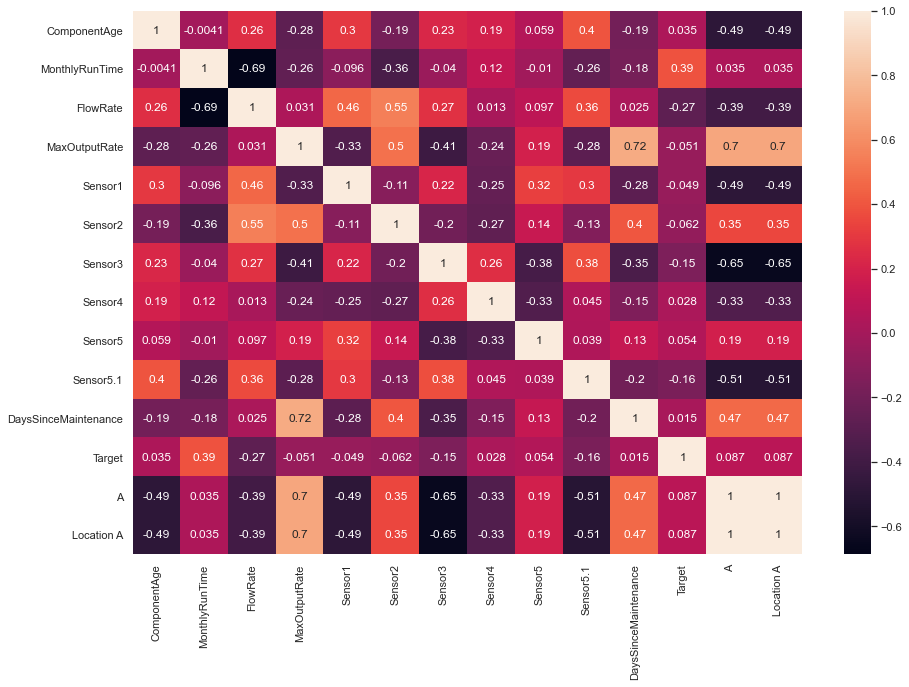

In [17]:
correlation = data.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

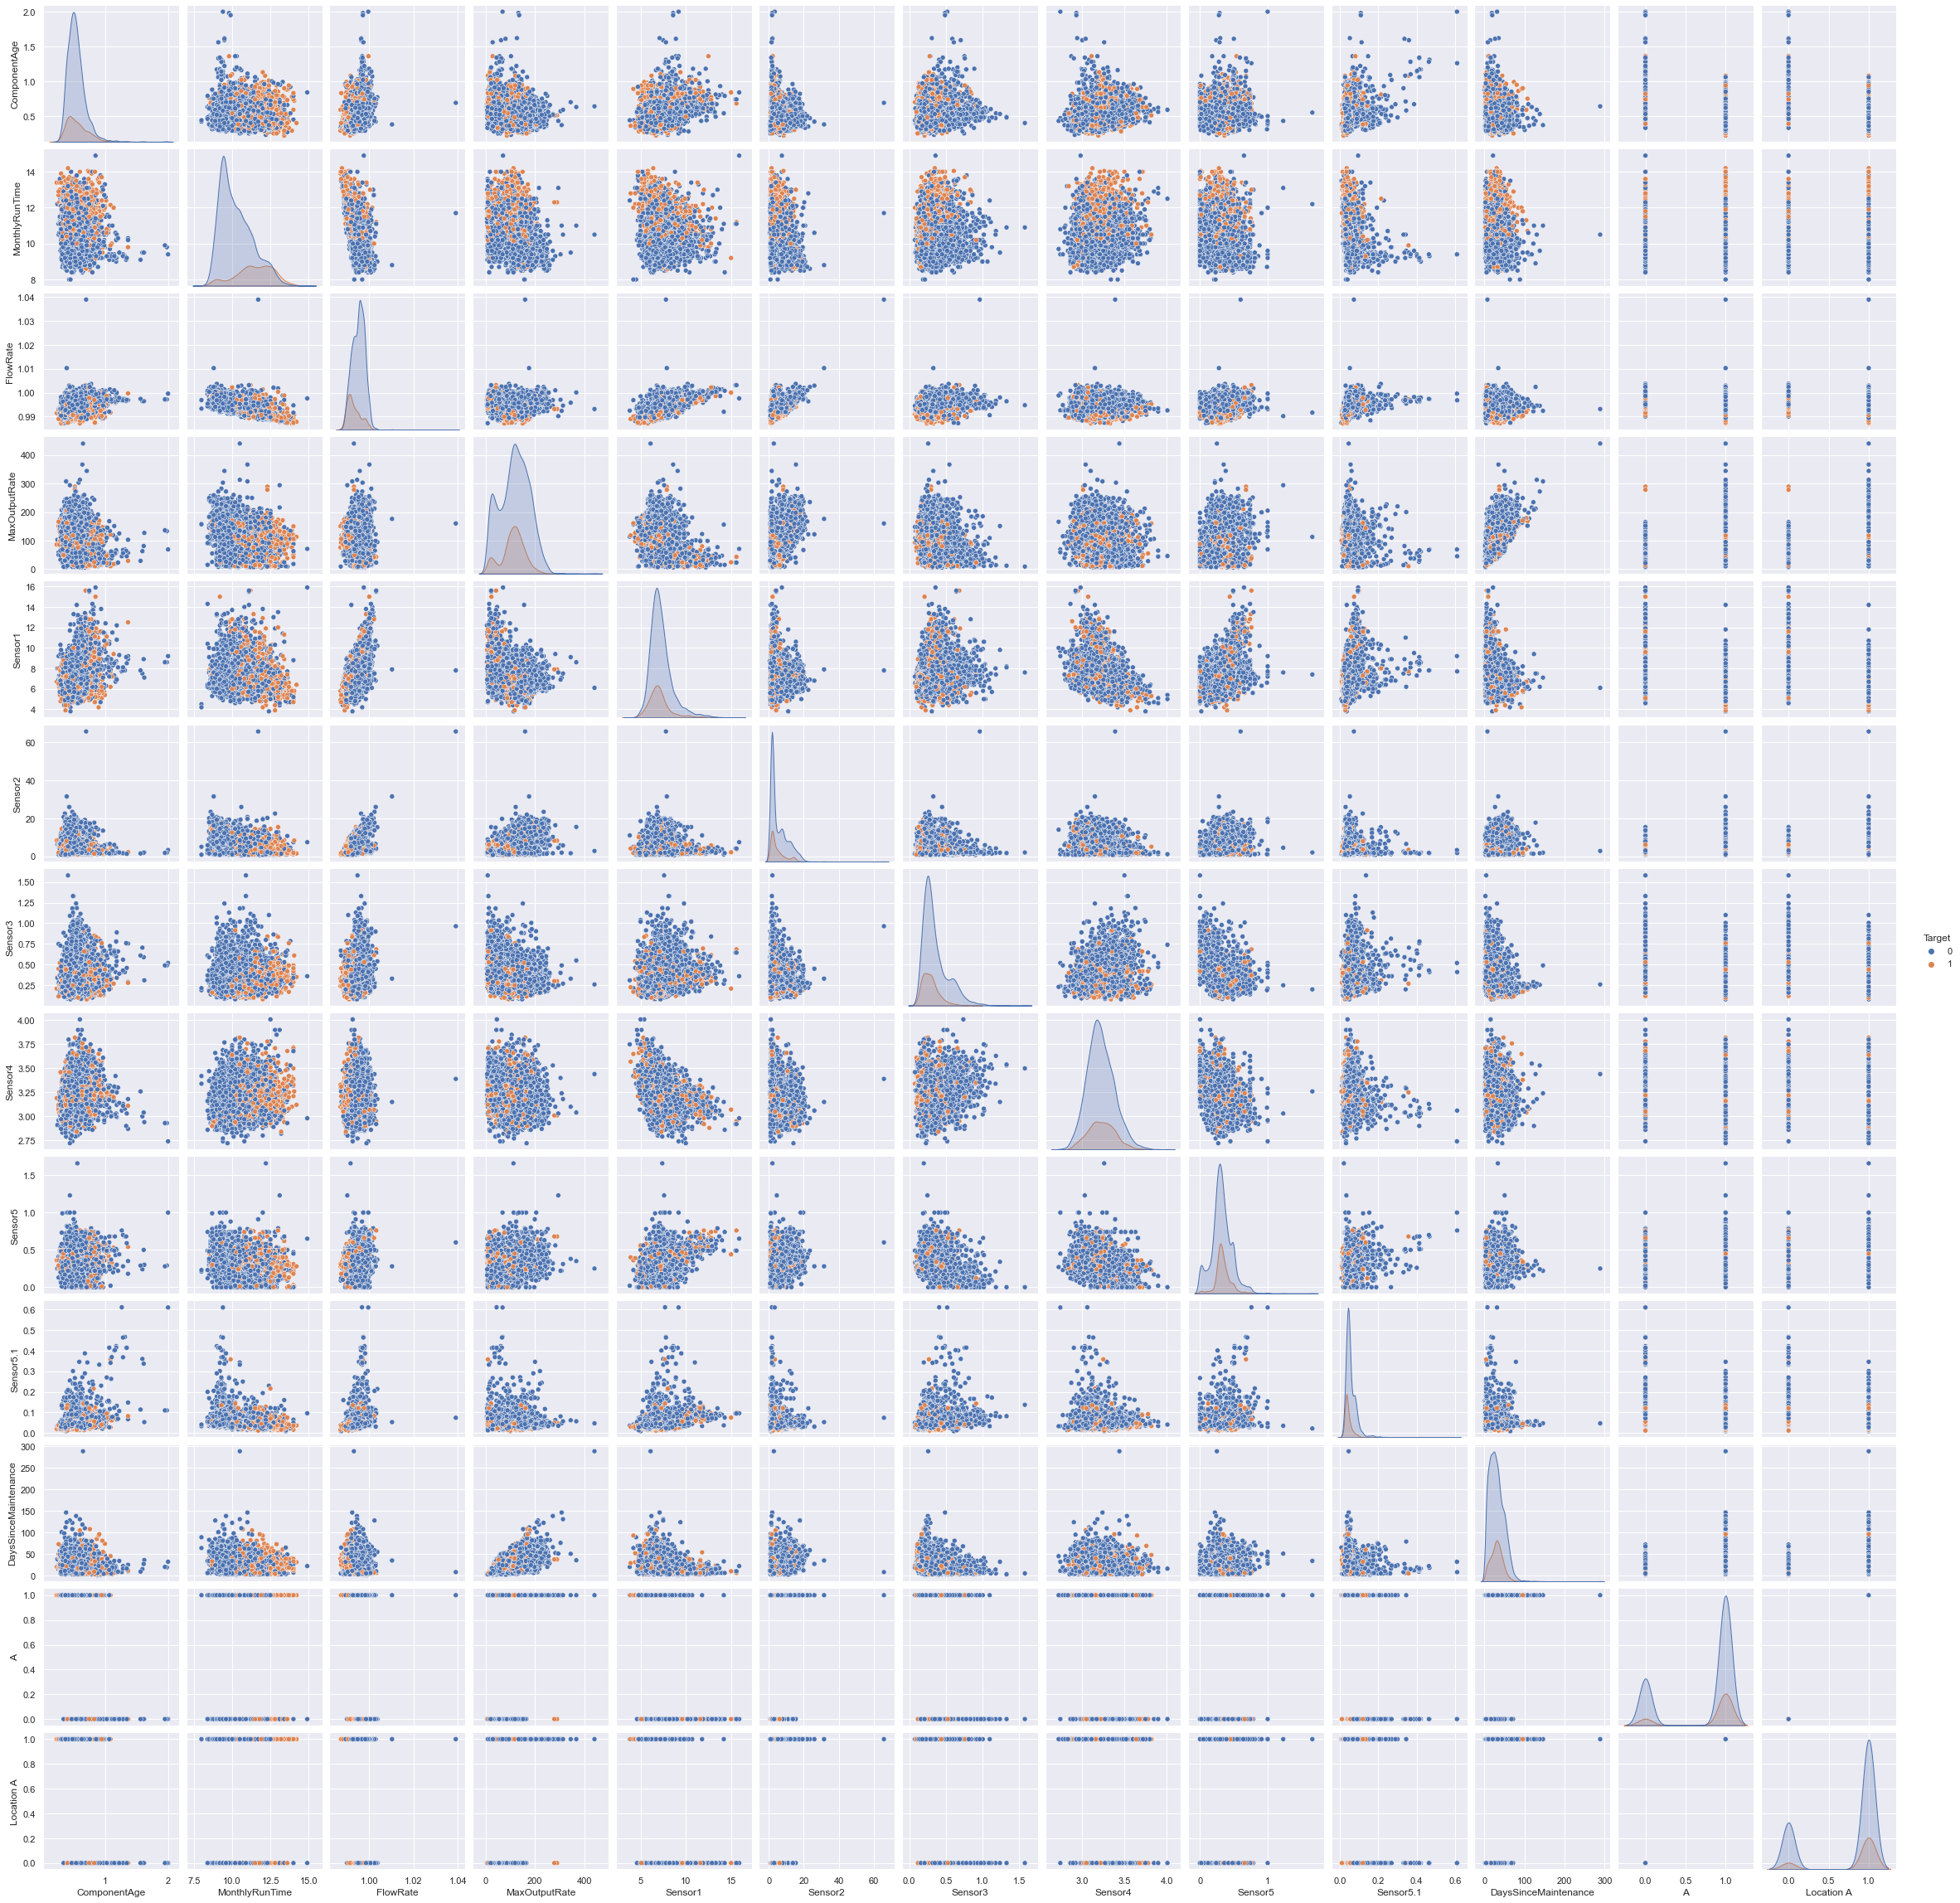

In [18]:
#plot the relationship between each two variable to spot errors
sns.pairplot(data,hue='Target')

It would appear that from the above plot that variables of interest would be those associated to the performance of the marine power systems. Subsequent steps will look access how the variable impact to the predictive power.

Coding Decsion Tree

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
X.drop(columns=['Location','A'], axis = 1, inplace = True)
y=data['Target']
X.head(5) 

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1037
           1       0.59      0.59      0.59       256

    accuracy                           0.84      1293
   macro avg       0.74      0.74      0.74      1293
weighted avg       0.84      0.84      0.84      1293



C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


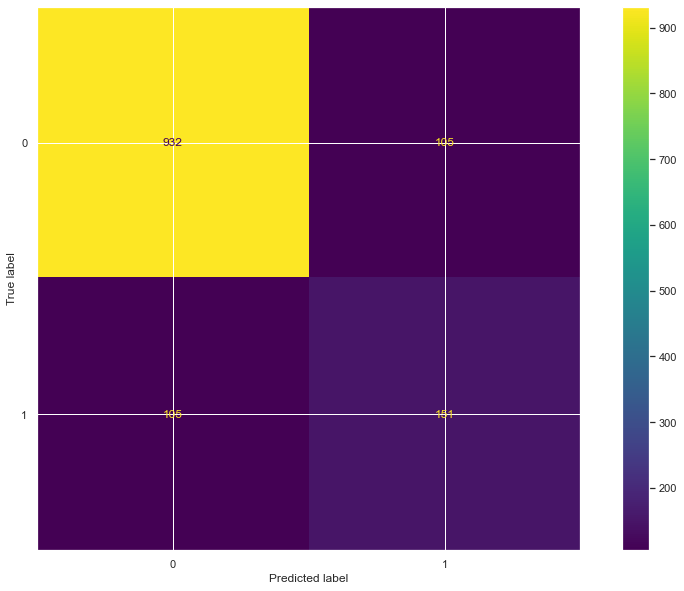

In [22]:
plot_confusion_matrix(model,X_test,y_test)

In [23]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.213735
Sensor2,0.100457
Sensor5,0.095070
ComponentAge,0.089472
DaysSinceMaintenance,0.084456
FlowRate,0.084071
Sensor4,0.072967
Sensor5.1,0.072338
Sensor1,0.069953
Sensor3,0.062836


MonthlyRunTime, Sensor 2, Componenet Age, Sensor5, FlowRate and DaySinceMaintence, although the feature importance values are low, appear to demonstrate the highest contribution towards the target variable

In [24]:
X.head(5)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [25]:
data['Target'].value_counts()

0    5192
1    1271
Name: Target, dtype: int64

In [26]:
data_1 = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/DS Exercise 3/MPS_cleanv2.csv")
data_1.head(5)
data_1['Target'].value_counts()

0    4290
1    1005
Name: Target, dtype: int64

The above result shows a bias/imbalance in the dataset towards 0

In [27]:
#Display classification report
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n');

In [28]:
report_model(model)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1037
           1       0.59      0.59      0.59       256

    accuracy                           0.84      1293
   macro avg       0.74      0.74      0.74      1293
weighted avg       0.84      0.84      0.84      1293





In [29]:
pruned_tree = DecisionTreeClassifier(max_depth=6)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1037
           1       0.60      0.44      0.51       256

    accuracy                           0.83      1293
   macro avg       0.73      0.68      0.70      1293
weighted avg       0.82      0.83      0.82      1293





Logistic Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

In [31]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
lm= log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)

log_model.score(X_test,y_test)

C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.8089713843774169

In [32]:
log_model.score(X_test,y_test)
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.213735
Sensor2,0.100457
Sensor5,0.095070
ComponentAge,0.089472
DaysSinceMaintenance,0.084456
FlowRate,0.084071
Sensor4,0.072967
Sensor5.1,0.072338
Sensor1,0.069953
Sensor3,0.062836


Improve predictive power of model

In [33]:
X.drop(columns=['Location A','Sensor4','Sensor3','Sensor1','DaysSinceMaintenance','Sensor5.1'], axis = 1, inplace = True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
print(classification_report(y_test,base_preds))

#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

(5170, 6)
(1293, 6)
(5170,)
(1293,)
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1037
           1       0.61      0.63      0.62       256

    accuracy                           0.85      1293
   macro avg       0.76      0.77      0.76      1293
weighted avg       0.85      0.85      0.85      1293



,Feature Importance
MonthlyRunTime,0.259138
Sensor5,0.158666
FlowRate,0.152552
Sensor2,0.148745
MaxOutputRate,0.147722
ComponentAge,0.133176


Logistic Regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
lm= log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)

log_model.score(X_test,y_test)

C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.8190255220417634

In [37]:
log_model.score(X_test,y_test)

0.8190255220417634

In [38]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.259138
Sensor5,0.158666
FlowRate,0.152552
Sensor2,0.148745
MaxOutputRate,0.147722
ComponentAge,0.133176


By reducing the number of variable, the predictive power has increased. However in the below classification report the the f1-score for '1' classification dropped.

In [39]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score, confusion_matrix
print(classification_report(y_test,log_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1037
           1       0.61      0.23      0.34       256

    accuracy                           0.82      1293
   macro avg       0.72      0.60      0.62      1293
weighted avg       0.79      0.82      0.79      1293

0.18097447795823665


In [40]:
accuracy_score(y_test,log_preds)

0.8190255220417634

C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


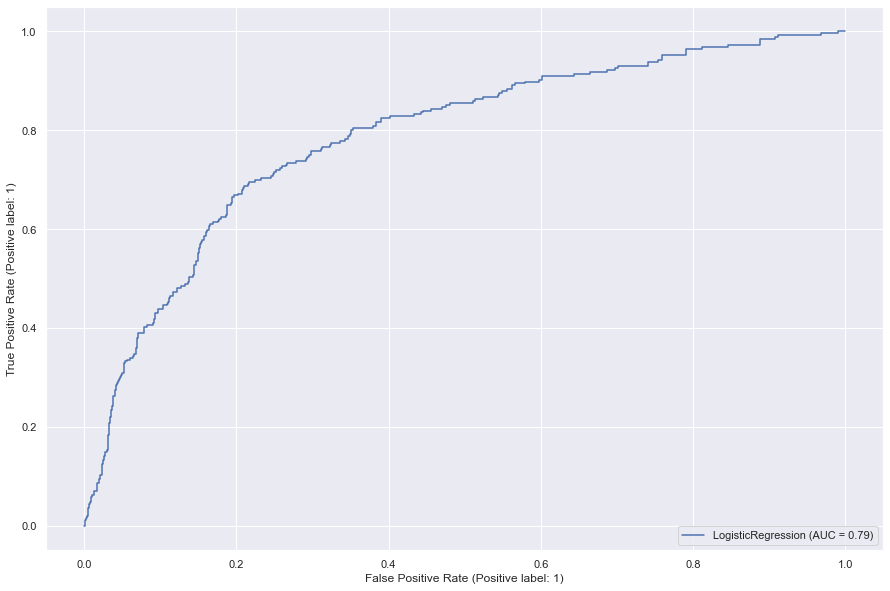

In [41]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(log_model, X_test,y_test)

AUC value is between 0.7-0.8 which is considered as fair. 
Suggestion:
-Next steps would be to reduce bias i.e. over sampling, under sampling or SMOTE. This can be observed in MPS_model.ipynb
-Apply class weights to see if this can improve the accuracy and AUC value